In [1]:
import numpy as np

In [3]:
!pwd

/content


In [2]:
class Perceptron(object):
  """ Perceptron classifier 
      ---------------------
      Parameters:
        eta : float    (Learning rate - between 0.0 and 1.0)
        n_iter : int   (Passes over the training dataset)
      Attributes:
        w_ : 1d-array  (Weights after fitting)
        errors_ : list (Number of misclassifications in every epoch)
  """
  
  def __init__(self, eta=0.01, n_iter=10):
    self.eta = eta
    self.n_iter = n_iter
    
  def fit(self, x, y):
    """ Fit training data
        -----------------
        Parameters:
          x : {array-like}, shape = [n_samples, n_features]
              (Training vectors, where n_samples is the number of samples
               and n_features is the number of features)
          y : {array-like}, shape = [n_samples]
              (Traget values)
        Returns:
          self : object
    """
    
    self.w_ = np.zeros(1 + x.shape[1])
    self.errors_ = []
    
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(x, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    
    return self
  
  def net_input(self, x):
    """ Calculate net input """
    return np.dot(x, self.w_[1:]) + self.w_[0]
  
  def predict(self, x):
    """ Return class label after unit step """
    return np.where(self.net_input(x) >= 0.0, 1, -1)


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0, 2]].values

In [6]:
import matplotlib.pyplot as plt

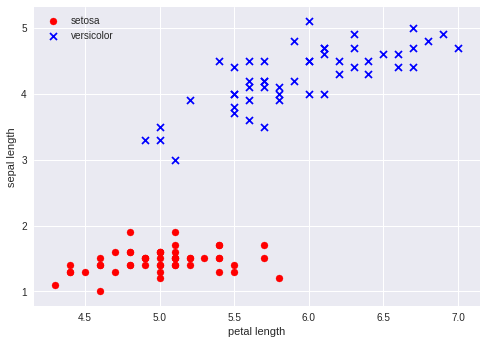

In [7]:
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(x, y)

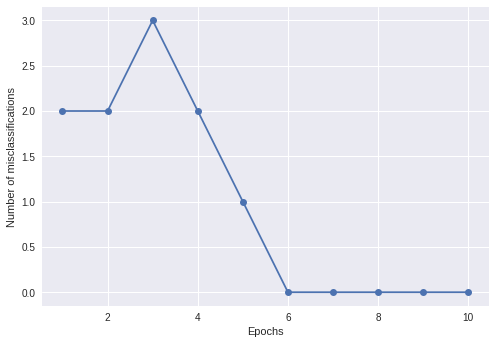

In [9]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [10]:
from matplotlib.colors import ListedColormap

In [15]:
def plot_decision_regions(x_fts, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ['s', 'x', 'o', '^', 'v']
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # plot the decision surface
  x1_min, x1_max = x_fts[:, 0].min() - 1, x_fts[:, 0].max() + 1
  x2_min, x2_max = x_fts[:, 1].min() - 1, x_fts[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)  
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x_fts[y == cl, 0], y=x_fts[y == cl, 1], alpha=0.8, 
                c=cmap(idx), marker=markers[idx], label=cl)

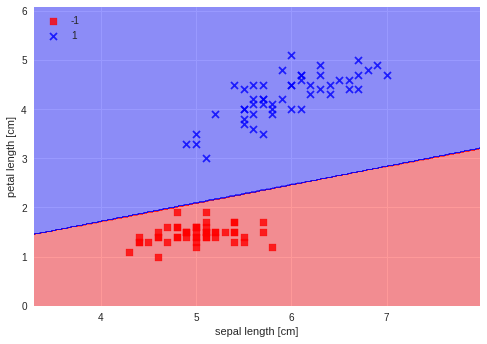

In [17]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()